# Perkenalan

Nama : Rizqi Golda

Batch : FTDS-018-RMT

Dataset : `https://www.kaggle.com/datasets/kukuroo3/churn-model-data-set-competition-form`

Objective : saya memiliki client yang memiliki sebuah toko, ia ingin mengetahui gambaran yang tepat untuk mengetahui aspek apa saja yang dapat menyebabkan seseorang tidak kembali berbelanja pada tokonya itu. dengan beberapa aspek yang telah catat selama ini, ia ingin mengetahui apakah kita dapat membuat model yang dapat memprediksi apakah seseorang itu akan kembali lagi atau tidak dengan memasukkan beberapa aspek yang telah ia catat. 

Hugginface : 

`https://huggingface.co/spaces/golda/milestone2` (backup error)

`https://huggingface.co/spaces/golda/pelangganyangpergi`

# Import Library

memasukkan semua library yang diperlukan selama proses `machine learning`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from feature_engine.outliers import Winsorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
import pickle
import json

# Data loading

mengambil data yang diperlukan dari `https://www.kaggle.com/datasets/kukuroo3/churn-model-data-set-competition-form` yang telah disimpan di lokal dalam bentuk `csv`

In [2]:
X_train_DataSheet = pd.read_csv('file:///home/ubuntu/Downloads/data milestone 2/X_train.csv')
X_test_DataSheet = pd.read_csv('file:///home/ubuntu/Downloads/data milestone 2/X_test.csv')
y_train_DataSheet = pd.read_csv('file:///home/ubuntu/Downloads/data milestone 2/y_train.csv')
y_test_DataSheet = pd.read_csv('file:///home/ubuntu/Downloads/data milestone 2/test_label/y_test.csv')

menggabungkan semua data


In [3]:
train_DataSheet = pd.concat([X_train_DataSheet, y_train_DataSheet], axis=1)
test_DataSheet = pd.concat([X_test_DataSheet, y_test_DataSheet], axis=1)
DataSheet = pd.concat([train_DataSheet, test_DataSheet], axis=0)
DataSheet.reset_index(inplace=True)

melihat 5 data teratas

In [4]:
DataSheet.head()

,index,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CustomerId,Exited
0,0,15799217,Zetticci,791,Germany,Female,35,7,52436.20,1,1,0,161051.75,15799217,0
1,1,15748986,Bischof,705,Germany,Male,42,8,166685.92,2,1,1,55313.51,15748986,0
2,2,15722004,Hsiung,543,France,Female,31,4,138317.94,1,0,0,61843.73,15722004,0
3,3,15780966,Pritchard,709,France,Female,32,2,0.00,2,0,0,109681.29,15780966,0
4,4,15636731,Ts'ai,714,Germany,Female,36,1,101609.01,2,1,1,447.73,15636731,0


melihat 5 data terbawah.

In [5]:
DataSheet.tail()

,index,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CustomerId,Exited
9995,3496,15733966,Johnstone,496,Germany,Female,55,4,125292.53,1,1,1,31532.96,15733966,1
9996,3497,15669994,Greece,556,Germany,Female,31,1,128663.81,2,1,0,125083.29,15669994,0
9997,3498,15712403,McMillan,589,France,Female,61,1,0.00,1,1,0,61108.56,15712403,1
9998,3499,15643819,Dawson,714,France,Female,25,4,0.00,2,0,0,82500.84,15643819,0
9999,3500,15644962,Connolly,745,France,Male,21,4,137910.45,1,1,1,177235.23,15644962,0


# EDA

## informasi datasheet sederhana

melihat informasi sederhana pada dataset diatas.

In [6]:
DataSheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  CustomerId       10000 non-null  int64  
 14  Exited           10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+ MB


Diketahui dari informasi di atas terdapat 15 kolom dengan 10000 baris data di dalam dataframe

In [7]:
DataSheet.describe().T

,count,mean,std,min,25%,50%,75%,max
index,10000.0,2.724200e+03,1776.698984,0.00,1249.75,2.499500e+03,3.998250e+03,6498.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


dari data diatas, dapat dilihat bahwa rata-rata usia konsumen berkisar pada usia 38 tahun, dan hanya sedikit dari mereka yang tidak mengunjungi toko kembali.

## dropping data yang tidak berguna pada pemodelan kali ini

saya lakukan eksplorasi data yang didapat tetapi tidak mengikutkan kolom `index`, `CustomerId`, dan `Surname`. saya beranggapan bahwa nilai `index`, `CustomerId` dan `Surname` tidak ada kaitannya dengan pelanggan yang tidak melakukan pembelanjaan lagi pada toko ini.

In [8]:
DataSheet_drop = DataSheet.loc[:, ~DataSheet.columns.isin(['index', 'CustomerId', 'Surname'])]
DataSheet_drop

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,791,Germany,Female,35,7,52436.20,1,1,0,161051.75,0
1,705,Germany,Male,42,8,166685.92,2,1,1,55313.51,0
2,543,France,Female,31,4,138317.94,1,0,0,61843.73,0
3,709,France,Female,32,2,0.00,2,0,0,109681.29,0
4,714,Germany,Female,36,1,101609.01,2,1,1,447.73,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,496,Germany,Female,55,4,125292.53,1,1,1,31532.96,1
9996,556,Germany,Female,31,1,128663.81,2,1,0,125083.29,0
9997,589,France,Female,61,1,0.00,1,1,0,61108.56,1
9998,714,France,Female,25,4,0.00,2,0,0,82500.84,0


## melihat korelasi antar feature terhadap kolom exited

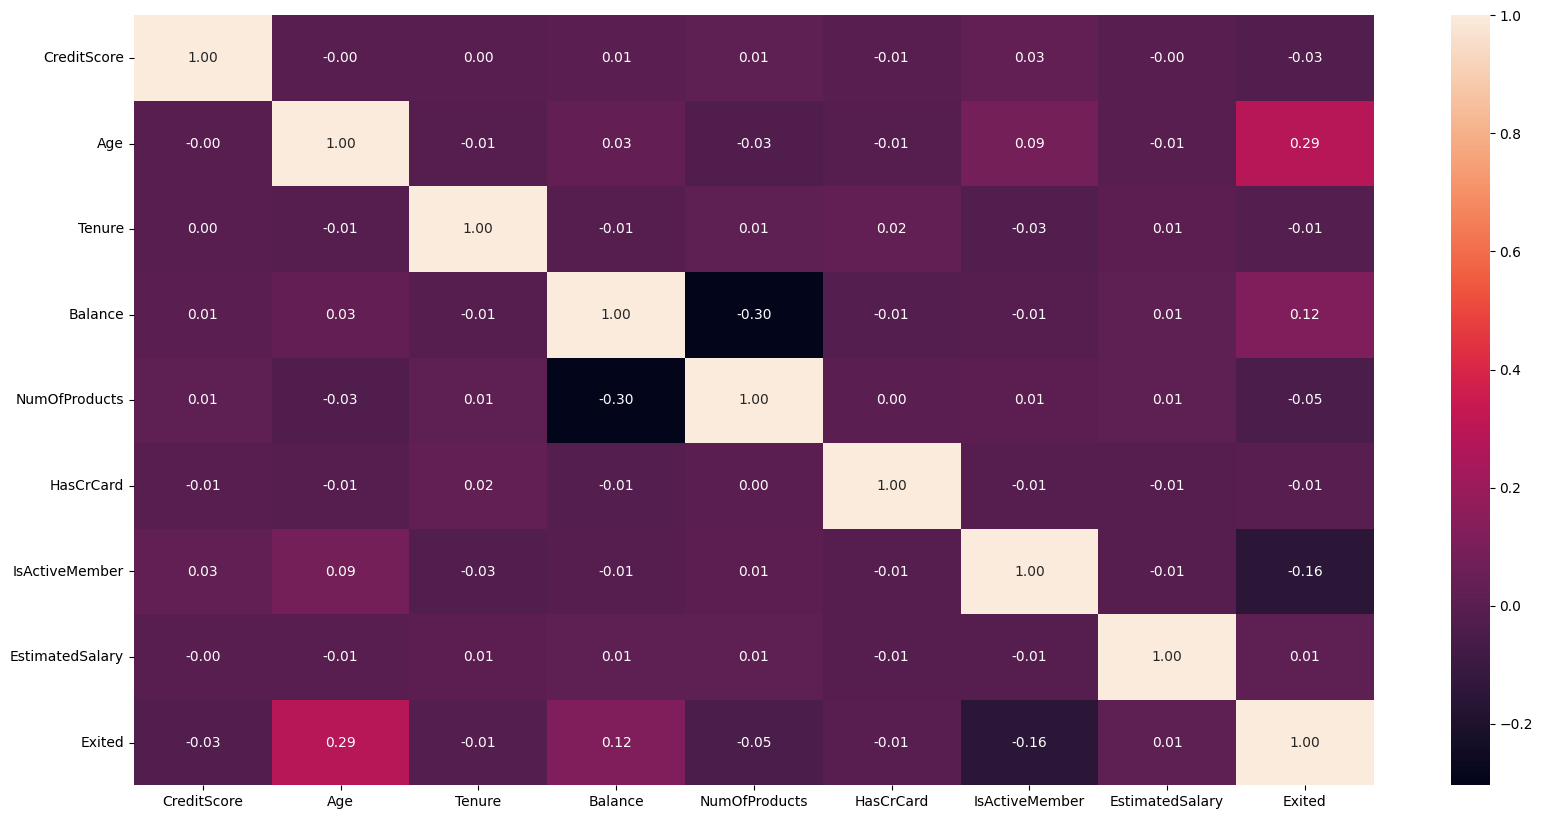

In [9]:
# Membuat visualisasi korelasi hubungan fitur terhadap target dengan heatmap()

plt.figure(figsize=(20,10))
sns.heatmap(DataSheet_drop.corr(), annot=True, fmt='.2f')
plt.show()

dari data korelasi yang ditampilkan diatas, didapati bahwa pelanggan yang tidak berbelanja kembali memiliki korelasi yang positif pada usia pelanggan dan saldo kredit yang pelanggan miliki, tetapi memiliki korelasi negatif terhadap pelanggan yang telah menjadi member di toko.

## melihat pierchart persentase konsumen yang berhenti berbelanja dengan yang tidak berhenti berbelanja

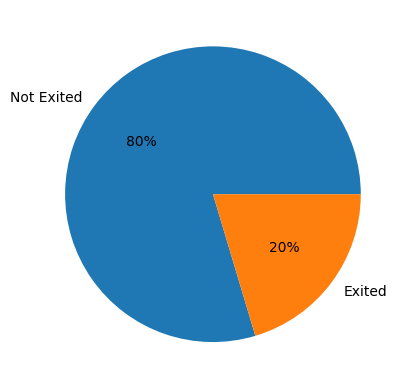

In [10]:
plt.pie(DataSheet_drop['Exited'].value_counts(), labels=['Not Exited', 'Exited'], autopct='%.0f%%')
plt.show() 

In [11]:
pd.DataFrame(DataSheet_drop['Exited']).value_counts()

Exited
0         7963
1         2037
dtype: int64

dari piechart data diatas, dapat dilihat bahwa terdapat 20% atau sebesar 7963 konsumen yang berhenti berbelanja pada toko, dan 80% atau sebesar 2036 masih berbelanja pada toko.  

## melihat countplot pada data kategorikal

Text(0.5, 1.0, 'Exited')

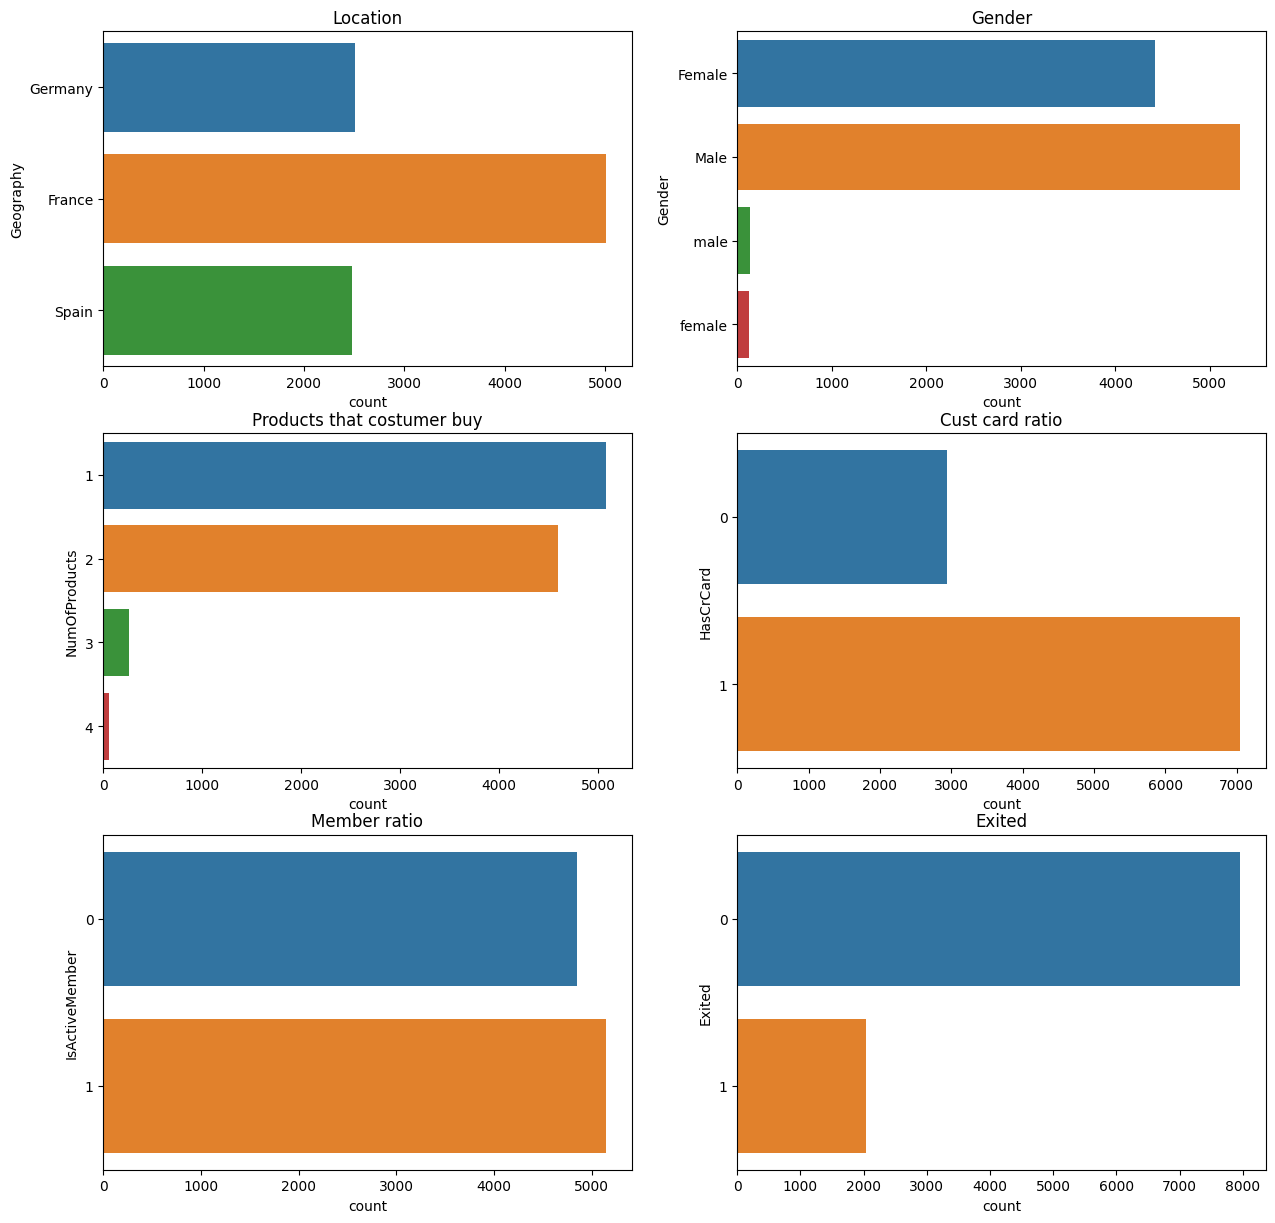

In [12]:
# Membuat visualisasi distribusi data melalui .countplot()

plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(y='Geography', data=DataSheet_drop)
plt.title('Location')

plt.subplot(4, 2, 2)
sns.countplot(y='Gender', data=DataSheet_drop)
plt.title('Gender')

plt.subplot(4, 2, 3)
sns.countplot(y='NumOfProducts', data=DataSheet_drop)
plt.title('Products that costumer buy')

plt.subplot(4, 2, 4)
sns.countplot(y='HasCrCard', data=DataSheet_drop)
plt.title('Cust card ratio')

plt.subplot(4, 2, 5)
sns.countplot(y='IsActiveMember', data=DataSheet_drop)
plt.title('Member ratio')

plt.subplot(4, 2, 6)
sns.countplot(y='Exited', data=DataSheet_drop)
plt.title('Exited')

dari data countplot yang ditampilkan diatas, konsumen yang paling banyak mengunjungi toko yaitu konsumen di negara prancis. jenis kelamin yang sering mengunjungi toko yaitu berjenis laki-laki serta terdapat beberapa data yang salah melakukan input dengan format yang disediakan. konsumen yang berbalanja pada toko biasanya hanya membeli 1 produk disetiap transaksi. hampir 70% dari total konsumen memiliki kartu kredit. konsumen yang menjadi member pada toko berjumlah lebih dari 5000 orang.

## melihat persebaran data numerik

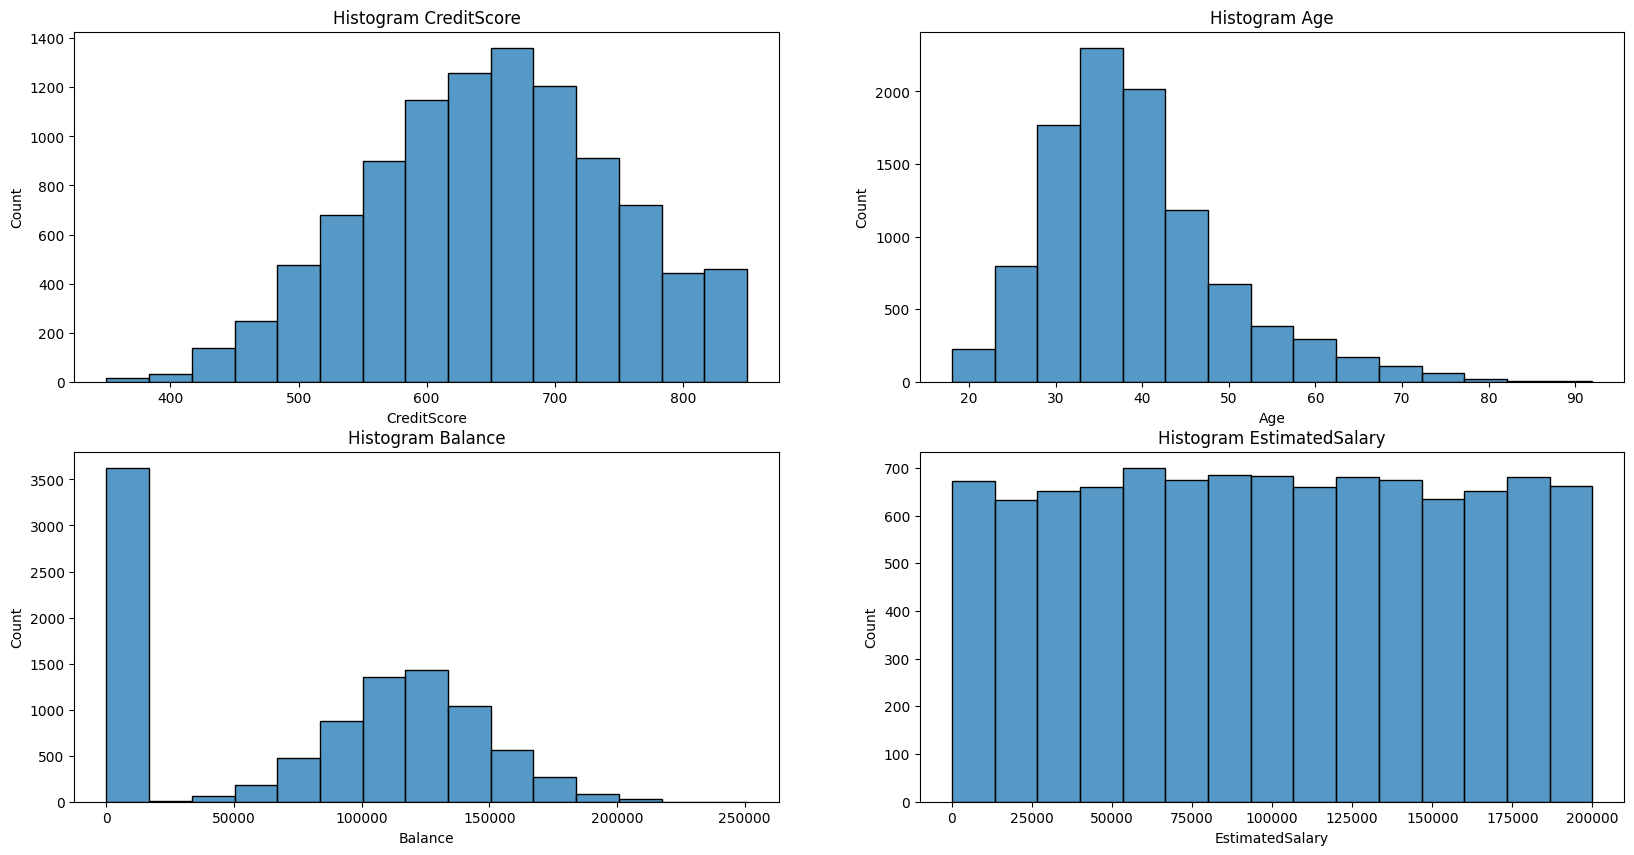

In [13]:
# Membuat visualisasi sebaran data pada kelompok kolom usia funding dan kolom usia milestone

plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1)
sns.histplot(DataSheet_drop['CreditScore'], bins=15)
plt.title('Histogram CreditScore')

plt.subplot(2, 2, 2)
sns.histplot(DataSheet_drop['Age'], bins=15)
plt.title('Histogram Age')

plt.subplot(2, 2, 3)
sns.histplot(DataSheet_drop['Balance'], bins=15)
plt.title('Histogram Balance')

plt.subplot(2, 2, 4)
sns.histplot(DataSheet_drop['EstimatedSalary'], bins=15)
plt.title('Histogram EstimatedSalary')

plt.show()

dengan melihat histogram pada data numerik, dapat dilihat bahwa skor kredit setiap pelanggang memiliki modus paling besar yaitu pada 645-675 dengan kisaran data dari 350 sampai 850. usia pelanggan berkisar antara 18 tahun sampai 92 tahun dengan modus di usis 33-38 tahun. *balance* kartu kredit pada data diatas berkisar antara `0$` sampai `250898$` dengan modus pada kisaran `0` sampai `18000$`. dan estimasi gaji yang dihasilkan oleh pelanggan berkisar antara `11,5$` sampai `199992.5$`.

# Features Enginering

men-duplikat datasheet supaya datanya tidak rusak selama kegiatan berlangsung

In [14]:
df = DataSheet_drop.copy()

## Handling unique value of `gender` columns

disini saya melakukan pengubahan data `gender` yang tidak sesuai dengan formatnya.

In [15]:
for i in range(len(df['Gender'])):
    if df['Gender'][i] == ' male':
        df['Gender'][i] = 'Male'

/tmp/ipykernel_33439/1179973712.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'][i] = 'Male'


In [16]:
for i in range(len(df['Gender'])):
    if df['Gender'][i] == 'female':
        df['Gender'][i] = 'Female'

/tmp/ipykernel_33439/3728140836.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'][i] = 'Female'


In [17]:
df['Gender'].unique()


array(['Female', 'Male'], dtype=object)

terlihat dari data gender diatas, terdapat 2 nilai unik saja yang tersedia, yaitu `Male` dan `Female`

## Splitting data train dan data tes

In [18]:
train, test = train_test_split(df, test_size=0.2, random_state=2)

print('Train Size : ', train.shape)
print('Test Size  : ', test.shape)

Train Size :  (8000, 11)
Test Size  :  (2000, 11)


Melakukan split terhadap data train dan data test, dengan komposisi 0.2 atau 80/20% dari data frame.

## melihat apa ada missing value pada data latihan

memastikan tidak ada missing value pada data latihan

In [19]:
train.isnull().mean()

CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

dari hasil yang diberikan diatas, tidak ditemukan data yang hilang pada data latihan.

## melihat kemiringan dari persebaran data

disini saya melakukan visualisasi `histogram` dan `boxplot` pada ke 4 data numerik yang telah saya yakini rawan akan adanya outlier.

In [20]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

membuat fungsi `histogram` dan `boxplot`

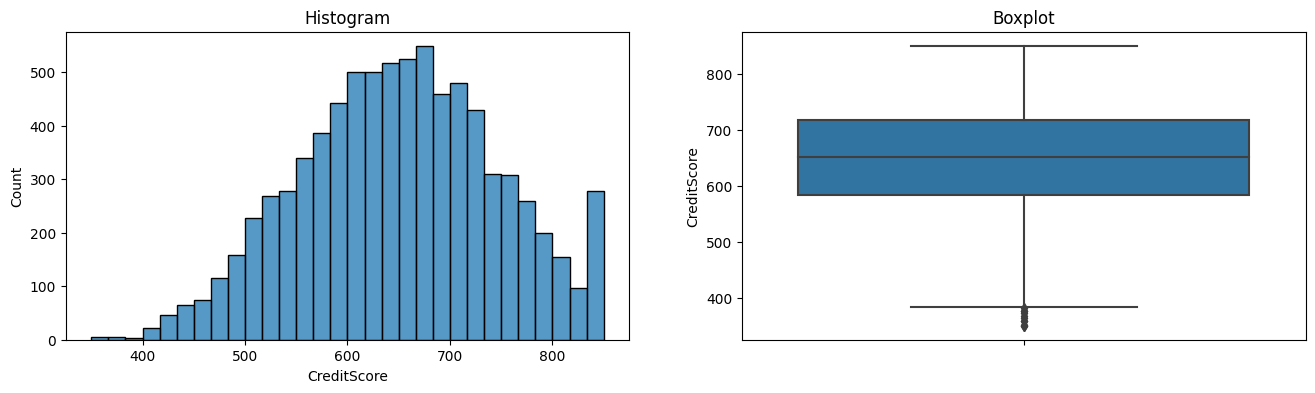

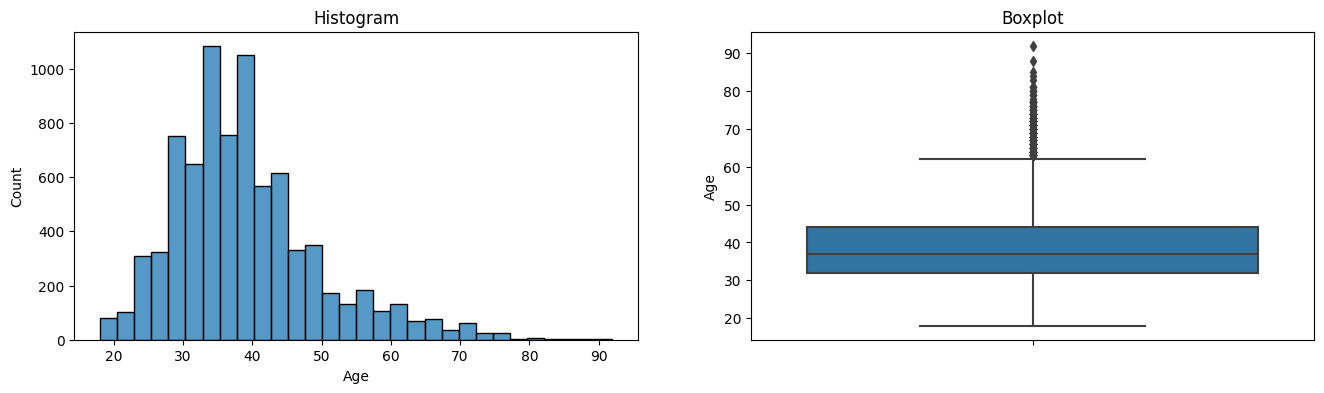

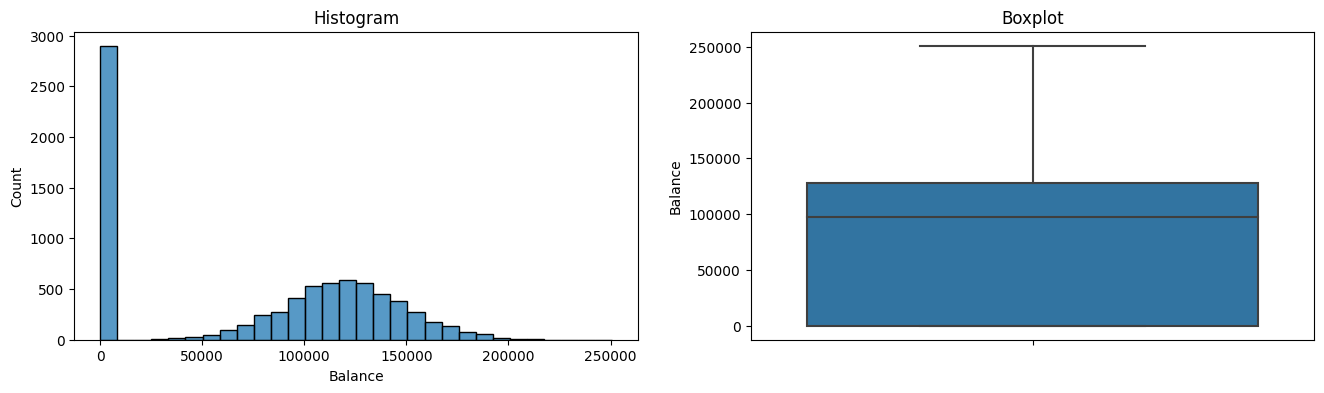

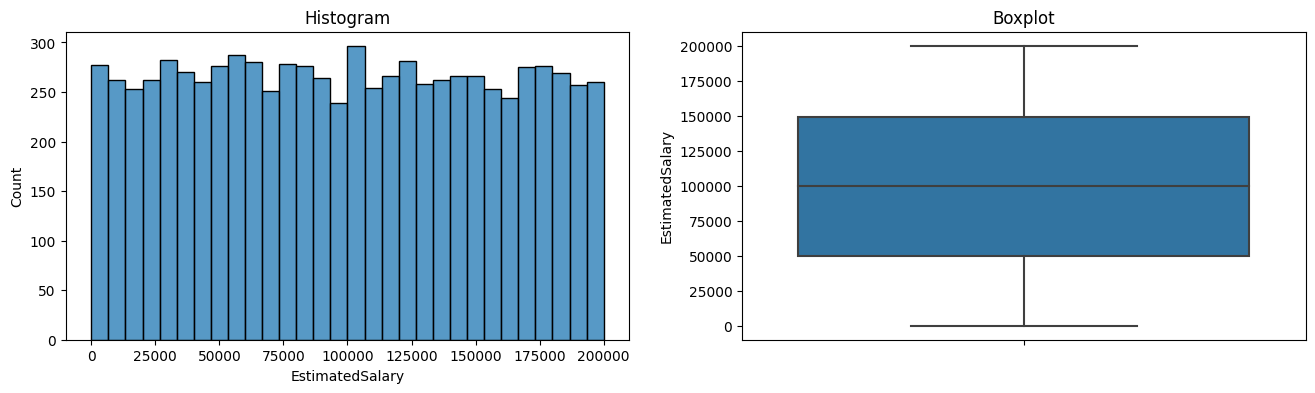

In [21]:
# melihat outlier pada surge multiplier dan distance

diagnostic_plots(train, 'CreditScore')
diagnostic_plots(train, 'Age')
diagnostic_plots(train, 'Balance')
diagnostic_plots(train, 'EstimatedSalary')


In [22]:
train[['Age', 'CreditScore', 'Balance', 'EstimatedSalary']].skew()

Age                1.000061
CreditScore       -0.055416
Balance           -0.141484
EstimatedSalary    0.015307
dtype: float64

pada data latihan diatas, terdapat persebaran data usia pelanggang yang berada diluar persebaran data normalnya. nilai kemiringan dari data usia mencapai lebih dari 1 sehingga perlu dilakukan perlakuan pada data usia. pada data skor kredit yang didapatkan, terlihat bahwa persebaran datanya masih tergolong normal menyerupai lonceng. pada data *balance* kartu kreditnya, masih dapat dikategorikan persebaran datanya normal karena bila di cek nilai kemiringan data masih berada diantara + 0,5 sampai -0,5. dan pada nilai estimasi gaji konsumen, masih berada pada persebaran data normal.

## handling outlier

disini saya akan meng-*handling* data outlier pada data usia.

In [23]:
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary


In [24]:
# Nilai batas 'BALANCE'
upper_BALANCE, lower_BALANCE = find_skewed_boundaries(train, 'Age', 3)
upper_BALANCE

80.0

disini saya menetapkan bahwa data pada kolom usia tertinggi akan saya batasi sampai usia 80 tahun saja. saya beranggapan bahwa konsumen yang berusia lebih dari 80 tahun akan susah untuk melakukan pembelanjaan sehingga kemungkinan pada saat input data usia pelanggan terjadi adanya kesalahan pada proses pemasukan datanya.

In [25]:
outliers_skew = np.where(train['Age'] > upper_BALANCE, True,
                       np.where(train['Age'] < lower_BALANCE, True, False))

data_trim = train.loc[~(outliers_skew)]
print('dataset data_train - sebelum dipangkas : ', train.shape)
print('dataset data_train - sesudah dipangkas : ', data_trim.shape)

dataset data_train - sebelum dipangkas :  (8000, 11)
dataset data_train - sesudah dipangkas :  (7992, 11)


setelah dilakukan penghapusan data, didapati bahwa data yang hilang berjumlah 8 dari 8000 data atau menyusut sebesar 0,1%. sehingga data akan saya lakukan penghilangan.

In [26]:
data_trim.skew()

/tmp/ipykernel_33439/3461048109.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_trim.skew()


CreditScore       -0.054802
Age                0.958187
Tenure             0.025022
Balance           -0.141781
NumOfProducts      0.735945
HasCrCard         -0.914873
IsActiveMember    -0.064610
EstimatedSalary    0.014312
Exited             1.455449
dtype: float64

setelah data dilakukan pembersihan data yang melebihi outlier, didapat bahwa data memiliki persebaran yang lebih baik. untuk data `Exited` masih berada diatas angka 1, tetapi tidak saya lakukan pembersihan data dikarenakan datanya merupakan data output yang nantinya model akan memprediksi data `Exited`.

## split data input dan output

In [27]:
X_train = data_trim.drop(['Exited'], axis=1)
X_test = test.drop(['Exited'], axis=1)

y_train = data_trim['Exited']
y_test = test['Exited']

data `Exited` akan saya jadikan `output`, dan sisanya akan saya jadikan sebagai `input` nya

## split data numerik dan kategorikal

In [28]:
X_num_skew = ['Age','NumOfProducts']
X_num_norm = ['CreditScore', 'Tenure', 'Balance','EstimatedSalary']
X_cat = ['HasCrCard', 'IsActiveMember', 'Geography', 'Gender']

disini saya membagi data menjadi beberapa kelompok, yaitu:
1. data numerik yang memiliki persebaran data yang tidak normal antara lain data `Age, NumOfProducts`
2. data numerik yang memiliki persebaran data yang normal antara lain data `'CreditScore', 'Tenure', 'Balance','EstimatedSalary'`
3. data kategori yang tidak memiliki `ranking` antar data antara lain data `'HasCrCard', 'IsActiveMember', 'Geography', 'Gender'`

In [29]:
DataSheet_drop.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

## pipeline 1

### ColumnTransformer

In [30]:
numeric_transformer_skew = Pipeline(
    steps=[("scaler", MinMaxScaler())]
)

numeric_transformer_norm = Pipeline(
    steps=[("scaler", StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[        
    ("encoder", OneHotEncoder(handle_unknown="ignore"))    
    ]
)

preprocessor = ColumnTransformer(
    transformers=[        
    ("num_skew", numeric_transformer_skew, X_num_skew),      
    ("num_norm", numeric_transformer_norm, X_num_norm),     
    ("cat", categorical_transformer, X_cat)
    ]
)

disini saya membuat transformer untuk proses pipelining. transform disini berisikan tentang metode scaling dan encoding. pada metode scaling, data dibagi menjadi 2, yaitu data numerik yang memiliki persebaran data yang normal dan data numerik yang memilik persebaran daya yang miring. pada data numerik yang memiliki persebaran normal, dilakukan dengan menggunakan metode `StandardScaller`. untuk data numerik lainnya akan digunakan metode `MinMaxScaller`. pada data kategorikal, dilakukan encode dengan metode `OneHotEncoder` dengan memberikan parameter ignore. ketiga data tersebut yang telah di *scale* dan di *encode* digabungkan dan nantinya akan dilakukan pipeline pada beberapa model klasifikasi *supervised*

# Model Defination

pada model yang digunakan kali ini, digunakan sebanyak 5 model untuk keperluan klasifikasi, model tersebut antara lain:

1. *LogisticRegression*
    Logistik regresi dalam machine learning adalah suatu teknik untuk melakukan klasifikasi pada data dengan memprediksi probabilitas kelas target berdasarkan fitur-fitur yang ada.
    
2.  *SVC*
    SVC (Support Vector Classifier) dalam machine learning adalah sebuah algoritma untuk melakukan klasifikasi pada data dengan membagi data menggunakan hyperplane dengan margin maksimum.

3. *KNeighborsClassifier*
    KNeighborsClassifier dalam machine learning adalah sebuah algoritma untuk melakukan klasifikasi pada data dengan mencari k data terdekat dari data yang ingin diprediksi, lalu memilih kelas mayoritas dari k data tersebut sebagai hasil prediksi.

4. *RandomForestClassifier*
    RandomForestClassifier dalam machine learning adalah sebuah algoritma untuk melakukan klasifikasi pada data dengan membangun beberapa pohon keputusan (decision tree) dan menggabungkan hasil prediksi dari setiap pohon untuk memilih kelas target.

5. *GaussianNB*
    GaussianNB dalam klasifikasi machine learning adalah sebuah algoritma untuk melakukan klasifikasi pada data dengan menghitung probabilitas kelas target menggunakan distribusi normal (Gaussian) dari setiap fitur yang terdapat pada data.


In [31]:
lrc =  LogisticRegression()
svc = SVC()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
gnb = GaussianNB()

# Model Training

semua model klasifikasi dimasukkan kedalam pipeline yang telah kita bangun. setelah semua data yang telah di normalisasi selanjutnya akan dimasukkan kedalam model satu per satu. kemudian data latihan nantinya akan di `fit` pada model.

## pipeline 2

In [32]:
clf_lrc = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", lrc)]
)

clf_lrc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_skew',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'NumOfProducts']),
                                                 ('num_norm',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Tenure',
                                                   'Balance',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['HasCrCard',
                                                   'IsActiveMember',
                                                   'Geography', 'Gender'])])),
                ('classifier', LogisticRegression())])

In [33]:
clf_svc = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", svc)]
)

clf_svc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_skew',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'NumOfProducts']),
                                                 ('num_norm',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Tenure',
                                                   'Balance',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['HasCrCard',
                                                   'IsActiveMember',
                                                   'Geography', 'Gender'])])),
                ('classifier', SVC())])

In [34]:
clf_knn = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", knn)]
)

clf_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_skew',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'NumOfProducts']),
                                                 ('num_norm',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Tenure',
                                                   'Balance',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['HasCrCard',
                                                   'IsActiveMember',
                                                   'Geography', 'Gender'])])),
                ('classifier', KNeighborsClassifier())])

In [35]:
clf_rfc = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", rfc)]
)

clf_rfc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_skew',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'NumOfProducts']),
                                                 ('num_norm',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Tenure',
                                                   'Balance',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['HasCrCard',
                                                   'IsActiveMember',
                                                   'Geography', 'Gender'])])),
                ('classifier', RandomForestClassifier())])

In [36]:
clf_gnb = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", gnb)]
)

clf_gnb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_skew',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'NumOfProducts']),
                                                 ('num_norm',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Tenure',
                                                   'Balance',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['HasCrCard',
                                                   'IsActiveMember',
                                                   'Geography', 'Gender'])])),
                ('classifier', GaussianNB())])

# Model Evaluation

model yang telah di-*train* kemudian dilakukan prediksi untuk menentukan hasil output dengan menggunakan data latihan yang telah ada. hasilnya nanti akan dicocokkan dengan output aslinya dan dilihat seberapa kemiripannya output yang dihasilkan oleh model dan output yang dipunya. penilaian model yang digunakan ialah dengan menggunakan penilaian rata-rata f1.

## predict

membuat hasil prediksi dari model yang telah dibuat.

In [37]:
lrc_pred = clf_lrc.predict(X_train)
svc_pred = clf_svc.predict(X_train)
knn_pred = clf_knn.predict(X_train)
rfc_pred = clf_rfc.predict(X_train)
gnb_pred = clf_gnb.predict(X_train)

## crosval mean f1

melihat nilai `cross validation` yang telah diulang sebanyak 5 kali dengan sistem penilaian menggunakan `f1`.

In [38]:
f1_score_train_cross_val_1 = cross_val_score(clf_lrc, 
                                           X_train, 
                                           y_train, 
                                           cv=5, 
                                           scoring='f1')

In [39]:
f1_score_train_cross_val_2 = cross_val_score(clf_svc, 
                                           X_train, 
                                           y_train, 
                                           cv=5, 
                                           scoring='f1')

In [40]:
f1_score_train_cross_val_3 = cross_val_score(clf_knn, 
                                           X_train, 
                                           y_train, 
                                           cv=5, 
                                           scoring='f1')

In [41]:
f1_score_train_cross_val_4 = cross_val_score(clf_rfc, 
                                           X_train, 
                                           y_train, 
                                           cv=5, 
                                           scoring='f1')

In [42]:
f1_score_train_cross_val_5 = cross_val_score(clf_gnb, 
                                           X_train, 
                                           y_train, 
                                           cv=5, 
                                           scoring='f1')

## score

melihat hasil penilaian dari model yang dilakukan dengan penilaian nilai evaluasi model tersebut. setelah itu dicari nilai prediksinya dan dilihat nilai cross validation yang dinilai dari rata-rata f1 score.

In [43]:
print("Evaluation: logReg")
print('Training score: {:.4f}'.format(clf_lrc.score(X_train, y_train)))
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val_1.mean())
print("\nEvaluation: SVC")
print('Training score: {:.4f}'.format(clf_svc.score(X_train, y_train)))
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val_2.mean())
print("\nEvaluation: KNN")
print('Training score: {:.4f}'.format(clf_knn.score(X_train, y_train)))
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val_3.mean())
print("\nEvaluation: RFC")
print('Training score: {:.4f}'.format(clf_rfc.score(X_train, y_train)))
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val_4.mean())
print("\nEvaluation: GNB")
print('Training score: {:.4f}'.format(clf_gnb.score(X_train, y_train)))
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val_5.mean())

Evaluation: logReg
Training score: 0.8102
F1 Score - Mean - Cross Validation :  0.3139315576960332

Evaluation: SVC
Training score: 0.8129
F1 Score - Mean - Cross Validation :  0.11765226287150683

Evaluation: KNN
Training score: 0.8307
F1 Score - Mean - Cross Validation :  0.24074594443479072

Evaluation: RFC
Training score: 1.0000
F1 Score - Mean - Cross Validation :  0.5800781152383498

Evaluation: GNB
Training score: 0.8151
F1 Score - Mean - Cross Validation :  0.47462706807462707


dari nilai semua model, terlihat bahwa nilai dengan model RFC mendapatkan hasil tertinggi untuk rata-rata f1 score. Training score pada model RFC mampu mendapatkan nilai yang sempurna, sehingga model mampu mengklasifikasi data latihan tanpa ada kesalahan klasifikasi.

## hyperparameter Tuning

Adapun hyperparameter yang akan dilakukan simulasi menggunakan GridSearchCV() akan dipilih berdasarkan evaluasi nilai scoring `mean f1 score` pada model yang paling baik. dari pencarian model terbaik diatas, didapatkan bahwa model `Random Forrest Classifier` adalah model terbaiknya. 

Berikut adalah parameter dan nilai set dari parameter yang akan dilakukan simulasi pemodelan menggunakan GridSearchCV() untuk dihasilkan hyperparameternya:

n_estimators = [10, 50, 100]

criterion = ['gini', 'entropy', 'log_loss']

max_features = ['sqrt', 'log2', None]

In [44]:
n_estimators = [10, 50, 100]
criterion = ['gini', 'entropy', 'log_loss']
max_features = ['sqrt', 'log2', None]
grid_search_RFC = [{'classifier__n_estimators': n_estimators,
               'classifier__criterion':criterion,
               'classifier__max_features': max_features}]
grid_search_RFC

[{'classifier__n_estimators': [10, 50, 100],
  'classifier__criterion': ['gini', 'entropy', 'log_loss'],
  'classifier__max_features': ['sqrt', 'log2', None]}]

In [45]:
RFC_grid_Best = GridSearchCV(clf_rfc, 
                             grid_search_RFC, 
                             cv=5,
                             scoring='f1')
RFC_grid_Best.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_skew',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Age',
                                                                          'NumOfProducts']),
                                                                        ('num_norm',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['CreditScore',
                                                                          'Tenure',
                                                                          'Balance',
                                                                          'EstimatedSalary']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['HasCrCard',
                                                                          'IsActiveMember',
                                                                          'Geography',
                                                                          'Gender'])])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid=[{'classifier__criterion': ['gini', 'entropy',
                                                    'log_loss'],
                          'classifier__max_features': ['sqrt', 'log2', None],
                          'classifier__n_estimators': [10, 50, 100]}],
             scoring='f1')

dicari parameter terbaik dari pilihan diatas dengan menggunakan gridsearchCV dengan penilaian `F1`

In [46]:
RFC_params = RFC_grid_Best.best_params_
RFC_params

{'classifier__criterion': 'entropy',
 'classifier__max_features': None,
 'classifier__n_estimators': 100}

didapati bahwa parameter terbaik ialah `'criterion': 'entropy', 'max_features': None, 'n_estimators': 100` pada model *RFC*.

## tes dengan data train



In [47]:
RFC_best = RFC_grid_Best.best_estimator_
aa = RFC_best.score(X_train, y_train)
aaa = clf_rfc.score(X_train, y_train)
print('score RFC Best Params train : ', aa)
print('score RFC standart Params train : ', aaa)

score RFC Best Params train :  1.0
score RFC standart Params train :  1.0


In [48]:
y_pred_fin = RFC_best.predict(X_train)

print(classification_report(y_train,y_pred_fin))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6347
           1       1.00      1.00      1.00      1645

    accuracy                           1.00      7992
   macro avg       1.00      1.00      1.00      7992
weighted avg       1.00      1.00      1.00      7992



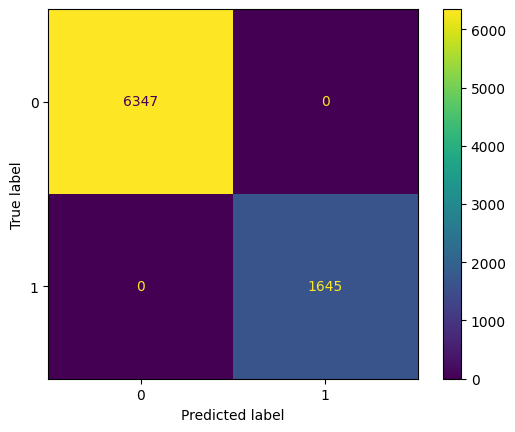

In [49]:
cm_train = confusion_matrix(y_train, y_pred_fin)
ConfusionMatrixDisplay(cm_train).plot()

setelah didapatkan parameter terbaik di model `RFC`, maka didapatkan nilai yang diuji pada data latihan sebesar 100%. penggunaan parameter terbaik pada model `RFC` mengalami persmaaan skor daripada model `RFC` dengan parameter default yang mencapai 100% nilainya.

skor `precision` pada model untuk menentukan komsumen yang kita prediksi akan kembali berbelanja pada toko dan memang benar mereka akan kembali berbelanja mendapatkan hasil  100%, sehingga tidak terdapat kesalahan dalam pengklasifikasian.
skor `precision` pada model untuk menentukan komsumen yang kita prediksi tidak akan kembali berbelanja pada toko dan memang benar mereka akan tidak kembali berbelanja mendapatkan hasil 100%, sehingga tidak terdapat kesalahan dalam pengklasifikasian.

sementara skor `recall` pada model untuk menentukan komsumen yang kita prediksi tidak akan kembali berbelanja pada toko namun nyatanya mereka kembali berbelanja pada toko mendapatkan hasil 0%, sehingga tidak terdapat kesalahan dalam pengklasifikasian.
skor `recall` pada model untuk menentukan komsumen yang kita prediksi akan kembali berbelanja pada toko namun nyatanya memamng benar mereka tidak kembali berbelanja pada toko mendapatkan hasil 0%, sehingga terdapat kesalahan dalam pengklasifikasian.

pada data latihan, diketahui bahwa:
1. True Positif  : model yang telah saya buat mampu memprediksi 6347 konsumen yang akan kembali berbelanja pada toko dan nyatanya memang mereka kembali berbelanja pada toko.
2. True Negatif  : model yang telah saya buat mampu memprediksi 1643 konsumen yang akan tidak lagi berbelanja pada toko dan nyatanya memang mereka tidak kembali berbelanja pada toko.
3. False Positif : model yang telah saya buat mampu memprediksi 0 konsumen yang akan tidak kembali berbelanja pada toko namun nyatanya memang mereka kembali berbelanja pada toko.
4. False Negatif : model yang telah saya buat mampu memprediksi 2 konsumen yang akan kembali berbelanja pada toko namun nyatanya memang mereka tidak kembali berbelanja pada toko.

## tes dengan data tes

In [50]:
bb = RFC_best.score(X_test, y_test)
bbb = clf_rfc.score(X_test, y_test)
print('score RFC Best Params test : ', bb)
print('score RFC standart Params test : ', bbb)

score RFC Best Params test :  0.8635
score RFC standart Params test :  0.8635


In [51]:
y_pred_fin_test = RFC_best.predict(X_test)

print(classification_report(y_test,y_pred_fin_test))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1609
           1       0.71      0.50      0.59       391

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



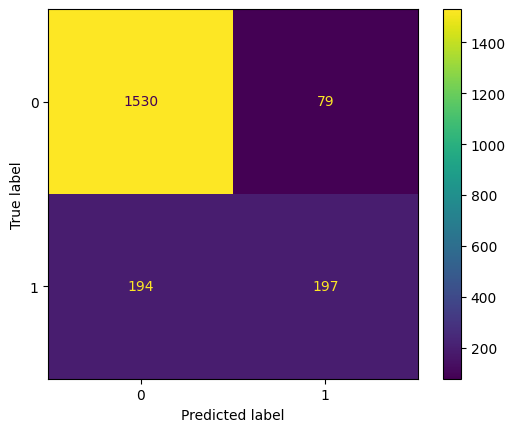

In [52]:
cm_test = confusion_matrix(y_test, y_pred_fin_test)
ConfusionMatrixDisplay(cm_test).plot()

setelah didapatkan parameter terbaik di model `RFC`, maka didapatkan nilai yang diuji pada data tes sebesar `0.8635`. nilai `RFC` pada parameter terbaik tidak mengalami peningkatan dari parameter defaultnya yang bernilai `0.8635`

skor `precision` pada model untuk menentukan komsumen yang kita prediksi akan kembali berbelanja pada toko dan memang benar mereka akan kembali berbelanja mendapatkan hasil 95%, sehingga terdapat kesalahan dalam pengklasifikasian sebanyak 1530/1609.
skor `precision` pada model untuk menentukan komsumen yang kita prediksi tidak akan kembali berbelanja pada toko dan memang benar mereka tidak akan kembali berbelanja mendapatkan hasil 51%, sehingga terdapat kesalahan dalam pengklasifikasian sebanyak 197/391.

sementara skor `recall` pada model untuk menentukan komsumen yang kita prediksi tidak akan kembali berbelanja pada toko namun nyatanya mereka kembali berbelanja pada toko mendapatkan hasil 79/277, sehingga terdapat kesalahan dalam pengklasifikasian.
skor `recall` pada model untuk menentukan komsumen yang kita prediksi akan kembali berbelanja pada toko namun nyatanya memamng benar mereka tidak kembali berbelanja pada toko mendapatkan hasil 194/1724, sehingga terdapat kesalahan dalam pengklasifikasian.

pada data latihan, diketahui bahwa:
1. True Positif  : model yang telah saya buat mampu memprediksi 1530 konsumen yang akan kembali berbelanja pada toko dan nyatanya memang mereka kembali berbelanja pada toko.
2. True Negatif  : model yang telah saya buat mampu memprediksi 197 konsumen yang akan tidak lagi berbelanja pada toko dan nyatanya memang mereka tidak kembali berbelanja pada toko.
3. False Positif : model yang telah saya buat mampu memprediksi 79 konsumen yang akan tidak kembali berbelanja pada toko namun nyatanya memang mereka kembali berbelanja pada toko.
4. False Negatif : model yang telah saya buat mampu memprediksi 194 konsumen yang akan kembali berbelanja pada toko namun nyatanya memang mereka tidak kembali berbelanja pada toko.

# Model Saving

In [53]:

with open('pipelines.pkl', 'wb') as file_1:
  pickle.dump(clf_rfc, file_1)

with open('X_num_skew.txt', 'w') as file_2:
  json.dump(X_num_skew, file_2)

with open('X_num_norm.txt', 'w') as file_3:
  json.dump(X_num_norm, file_3)

with open('X_cat.txt', 'w') as file_4:
  json.dump(X_cat, file_4)


In [54]:
DataSheet_drop

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,791,Germany,Female,35,7,52436.20,1,1,0,161051.75,0
1,705,Germany,Male,42,8,166685.92,2,1,1,55313.51,0
2,543,France,Female,31,4,138317.94,1,0,0,61843.73,0
3,709,France,Female,32,2,0.00,2,0,0,109681.29,0
4,714,Germany,Female,36,1,101609.01,2,1,1,447.73,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,496,Germany,Female,55,4,125292.53,1,1,1,31532.96,1
9996,556,Germany,Female,31,1,128663.81,2,1,0,125083.29,0
9997,589,France,Female,61,1,0.00,1,1,0,61108.56,1
9998,714,France,Female,25,4,0.00,2,0,0,82500.84,0


# Pengambilan Kesimpulan

## 1. model analysis

model yang digunakan kali ini terdapat 5 jenis, yaitu `LogisticRegression, SVC, KNeighborsClassifier, RandomForestClassifier` dan `GaussianNB`. pada kali ini, model yang terbaik menurut rata-rata f1 score yaitu RandomForestClassifier. saya menggunakan `f1 score` sebagai tolak ukur penilaian dikarenakan saya ingin mengetahui sebaik apa model yang saya buat dalam menentukan nilai `presition` dan `recall`-nya secara umum. dengan penggunaan model `RandomForestClassifier` sebagai model terbaiknya, maka didapati dengan tuning parameter, didapatkan bahwa hyperparameter yang terbaik ialah `classifier__criterion': 'entropy', 'classifier__max_features': None, 'classifier__n_estimators': 100`. ketika dilakukan pengujian pada data train, hasil skornya mendekati 100%. tetapi ketika dilakukan pengujian pada data test didapati hasilnya 86,5%. Model random forest cenderung overfit karena model tersebut dapat mempelajari setiap detail di set pelatihan yang mengarah pada model yang sangat cocok dengan data pelatihan, tetapi kurang dapat melakukan generalisasi dengan baik pada data baru. sangat disanyangkan pada pemilihan hyperparameter terbaik di model `RFC` tidak mengalami perubahan skornya pada data latihan, akan tetapi bila dilakukan pada data yang baru ia mengalami kenaikan pada nilai skornya. saran kedepannya untuk mendapatkan *improvement* pada model yang dibuat ialah dengan memberikan parameter yang lebih banyak, tetapi *drawback* dari penggunaan parameter yang banyak dalam penentuan hyperparameter terbaik akan menyebabkan semakin tinggi juga biaya yang diperlukan untuk `modeling`. data yang dicapai diharapkan dapat berimbang antara 1 dan lainnya, hal ini diharapkan karena data yang tidak berimbang persebarannya akan membuat model menjadi berat ke sebelah sehingga sulit untuk model menjadi tidak berpihak. dengan penggunaan metode `SMOTE` diharapkan mampu mengatasi hal tersebut, akan tetapi penggunaan metode `smote` akan membuat biaya pengerjaan akan naik pula.

## 2. Overall analysis

pada tugas kali ini, didapati bahwa kita akan melakukan klasifikasi pada konsumen toko yang akan kembali atau tidak. dikarenakan client saya ingin mengetahui gambaran secara umum, maka disini saya menggunakan penilaian dengan nilai rata-rata `f1`. data yang saya dapatkan sebenarnya sudah dipecah menjadi 4, saya lakukan penggabungan data dan saya lihat bagaimana EDA nya. setelah dilakukan penggabungan, terlihat dari informasi di atas terdapat 15 kolom dengan 10000 baris data di dalam datasheet tersebut dengan 2 kolom `CustomersId` yang sama. saya lakukan penghilangan pada 4 kolom, yaitu 2 kolom `CustomersId`, 1 kolom `index` dan 1 kolom `Surname`. hal itu saya lakukan dikarenakan saya berasumsi bahwa tidak ada kaitannya antara `CustomersId, index` dan `surname` pada tingginya data pelanggan yang tidak kembali lagi. setelah saya hilangkan 3 kolom unik tersebut, selanjutnya saya bagi data train dan data test dengan komposisi 80/20 yang dimana 80% itu adalah data train dan 20% itu adalah data tes. setelah dilakukan *handling missing value* dan *handling outlier*, maka datasheet tersebut dibagi menjadi data output yaitu `Exited` dan lainnya merupakan data input. data input digolongkan menjadi data numerik persebaran normal, data numerik persebaran tidak normal, dan data kategori. data input tersebut nantinya masuk kedalam pipeline yang dimana akan mengatasi `scaling, encoding` dan `concate` serta dilakukan `modeling`. hasil terbaik pada data tersebut diperoleh dengan model `random forest classifier`. dan selanjutnya dilakukan parameter tuning. setelah dilakukan parameter tuning, ternyata model yang dihasilkan tidak berbeda dengan model standart nya. sehingga hal ini perlu dilakukan penentuan parameter modeling yang lebih dalam agar model dapat mendapatkan hasil yang lebih baik.